# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [5]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [13]:
#Seu código aqui para a média
media = df.groupby('Categoria')[['Preco_Normal']].mean().round(2)
media

,Preco_Normal
Categoria,
belleza-y-cuidado-personal,1783.56
comidas-preparadas,3095.04
congelados,2108.04
frutas,1724.47
instantaneos-y-sopas,765.49
lacteos,2385.22
verduras,1343.30


In [14]:
#Seu código aqui para a mediana
mediana = df.groupby('Categoria')[['Preco_Normal']].median().round(2)
media

,Preco_Normal
Categoria,
belleza-y-cuidado-personal,1783.56
comidas-preparadas,3095.04
congelados,2108.04
frutas,1724.47
instantaneos-y-sopas,765.49
lacteos,2385.22
verduras,1343.30


Digite aqui as categorias: 

* belleza-y-cuidado-personal ---- Média acima, provavelmente com alguns preços altos que estão puxando a média

* comidas-preparadas ---- Média abaixo, provavelmente com alguns preços baixos puxando a média              

* congelados ---- Diferença grande da média bem acima, possivelmente contém outliers

* frutas ---- Média acima, provavelmente com alguns preços altos que estão puxando a média e possivelmente tem outliers

* instantaneos-y-sopas ---- Média acima, provavelmente com alguns preços altos que estão puxando a média

* lacteos ---- Média muito acima, outliers altos são bem prováveis

* verduras ---- Média acima, provavelmente com alguns preços altos que estão puxando a média

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [15]:
#Seu código aqui
desvio_padrao = df.groupby('Categoria')[['Preco_Normal']].std().round(2)
desvio_padrao

,Preco_Normal
Categoria,
belleza-y-cuidado-personal,2210.04
comidas-preparadas,2019.91
congelados,2111.54
frutas,1639.15
instantaneos-y-sopas,1170.23
lacteos,3925.82
verduras,1012.70


In [ ]:
#printando as medias e medianas para comparação
print(f"Média: {media}\n")
print(f"Mediana: {mediana}")

Média:                             Preco_Normal
Categoria                               
belleza-y-cuidado-personal       1783.56
comidas-preparadas               3095.04
congelados                       2108.04
frutas                           1724.47
instantaneos-y-sopas              765.49
lacteos                          2385.22
verduras                         1343.30

Mediana:                             Preco_Normal
Categoria                               
belleza-y-cuidado-personal        1569.0
comidas-preparadas                3290.0
congelados                        1519.0
frutas                            1195.0
instantaneos-y-sopas               439.0
lacteos                            989.0
verduras                          1180.0


Digite nesse campo o comportamento que você identificou:

As categorias com maior desvio padrão são:

 * lácteos

 * beleza-y-cuidado-personal

 * congelados

Em todas elas, a média é maior que a mediana, com a maior diferença sendo em lacteos, o que indica a presença outliers que aumentam o desvio padrão e puxam a média para cima. Esse comportamento é típico de uma distribuição assimétrica à direita.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

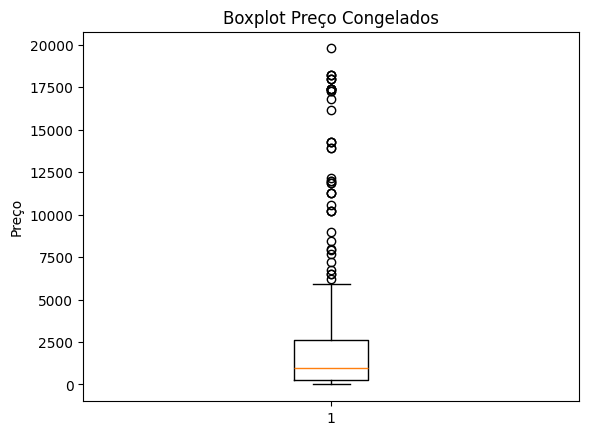

In [20]:
#Seu código aqui
plt.boxplot(df.loc[df['Categoria'] == 'lacteos', 'Preco_Normal'])
plt.title('Boxplot Preço Congelados')
plt.ylabel('Preço')
plt.show()

### A distribuição mostra que grande parte dos valores estão entre ~1000 e ~6500. A quantia de outliers em lacteos é grande, o que acaba bagunçando muito a média e o desvio padrão

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

Text(0.5, 1.0, 'Média Preço Desconto por Categoria')

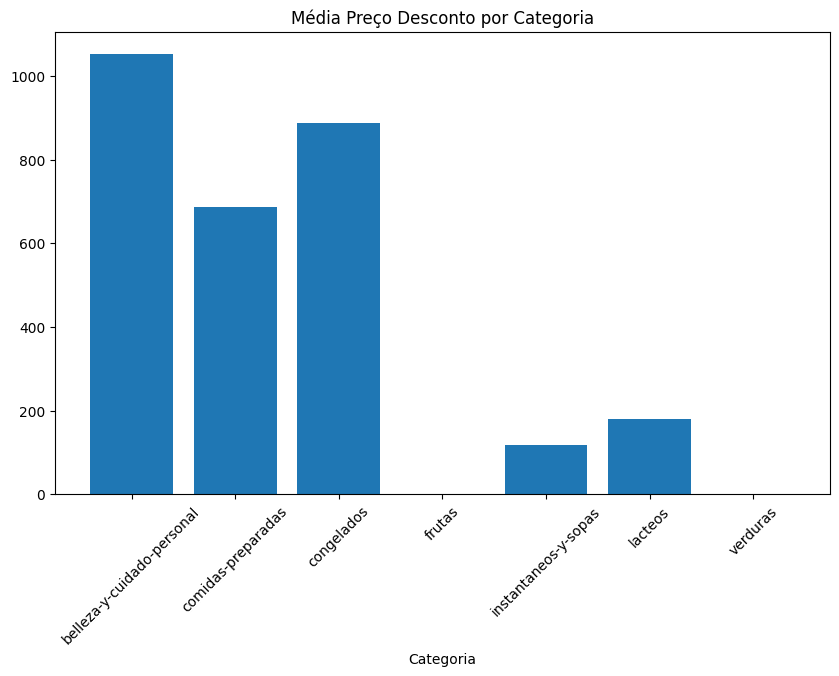

In [ ]:
# Seu código aqui
media_descontos = df.groupby('Categoria')[['Preco_Desconto']].mean().round(2)

plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.xlabel('Categoria')
plt.bar(media_descontos.index, media_descontos['Preco_Desconto'])
plt.title('Média Preço Desconto por Categoria')

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [29]:
#seu código aqui
desc_por_marca = df.groupby(['Categoria', 'Marca'])[['Desconto']].mean().reset_index()

fig = px.treemap(desc_por_marca, 
                 path=['Categoria', 'Marca'], 
                 values='Desconto',
                 color='Desconto',
                 color_continuous_scale='viridis',
                 title='Média de Desconto por Categoria e Marca')

fig.show()
